In [58]:
#The dataset from the #Internet Movie Database (IMDb) online database, consisting of information related to films, television series, podcasts, etc.
#This dataset was retrieved from Kaggle (https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset/code)

In [59]:
#1. Importing libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp


#profiling.ProfileReport() profile_report()


In [61]:
#2. Data Exploration

In [62]:
#2.1.
#Loading the dataset
df = pd.read_csv('movie_metadata.csv')

#Viewing the first 10 rows
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [63]:
#How many rows and columns does the dataset have?
 
num_rows, num_columns = df.shape
print('There are {} rows and {} columns'.format(num_rows, num_columns))
#There are 5043 rows and 28 columns


There are 5043 rows and 28 columns


In [64]:
#2.2. Dataset information

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [66]:
#2.3. Null value identification

In [67]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

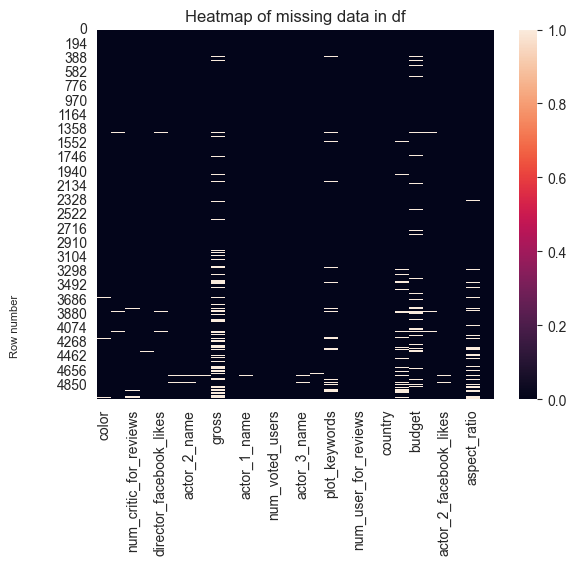

In [68]:
#Visualising missing data to gain insights into the completeness and quality of the dataset. 
sns.heatmap(df.isnull())
plt.title('Heatmap of missing data in df')
plt.annotate('Row number', xy=(-0.2, 0.2), xytext=(-2, 0),
             xycoords='axes fraction', textcoords='offset points',
             rotation=90, ha='center', va='center', fontsize=8)
plt.show()

In [69]:
#Summary: 

#We have 5043 entries (rows) , of which the variable "gross" has around ~17.53%  missing data, followed by budget ~10%, aspect_ratio 6.5%, content_rating 6%, , aspect_ratio ~7.5%. Variables such as plot_keywords are missing 3%, director_name 2% and other variables are missing less than 2% of data. Missing values are a common and complex challenge in research. 

In [70]:
#profiling.ProfileReport(df)
df.profile_report()

ModuleNotFoundError: No module named 'ipywidgets'

In [71]:
#2.3.1. Null value treatment

In [72]:
#To ensure both regression and classifaction model are fed best, 
# both continous and categorical variables are seperated.

In [73]:
#Object data types are in the categorical data list
categorical_data = [col for col in df.columns if df[col].dtype == 'object']

#Numeric / continous data are other variables, i.e. float / integer

numerical_data = [col for col in df.columns if df[col].dtype != 'object']


In [74]:
categorical_data, numerical_data

(['color',
  'director_name',
  'actor_2_name',
  'genres',
  'actor_1_name',
  'movie_title',
  'actor_3_name',
  'plot_keywords',
  'movie_imdb_link',
  'language',
  'country',
  'content_rating'],
 ['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'])

In [75]:
#2.3.2. Descriptive Statistics

In [76]:
#Descriptive Statistics for numerical columns

df[numerical_data].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [77]:
#Descriptive Statistics for categorical columns

df[categorical_data].describe()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5029,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,46,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [78]:
#Calculation of Missing value ratio 

#1. Calculate total number of rows
total_rows = df.shape[0]

# Calculate the ratio of missing values for each column
missing_ratio = (df.isnull().sum() / total_rows) * 100

# Print the missing ratio for each column
print("Missing value ratio for each column:")
print(missing_ratio)

Missing value ratio for each column:
color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.277613
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes     

In [79]:
df.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

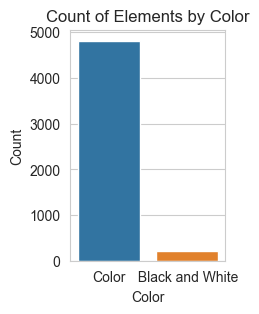

In [80]:
#Barplot of the color column

#1.Set the style of the plot
sns.set_style("whitegrid")
#2.Count the occurrences of each unique value in the "color" column
color_counts = df['color'].value_counts(dropna=False)
# Create a bar plot
plt.figure(figsize=(2, 3))
sns.barplot(x=color_counts.index, y=color_counts.values)
# Adding the labels and title
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Count of Elements by Color")
# Show the plot
plt.show()

#The visual shows there are ~4800 "color" movies and ~200 "Black and White" movies. 
# Given the small missing value size, I will use Mode Imputation to replace missing values. Furthermore,
#the movie years range from 1916 to 2016, it seems reasonable to assume most movies nowadays will be streamed in color.

In [81]:
#Mode imputation

#mode_color = df['color'].mode().iloc[0]
#df['color'].fillna(value = mode_color, inplace = True)

#Check if there are any missing values in the color column

#df['color'].isnull().sum() #0

In [82]:
#Counting director_name unique values and missing values
df['director_name'].nunique(), df['director_name'].isnull().sum() #(2398, 104)

#There are 4939 director_name of which 2398 are unique and 104 are missing.
#Given these characteristics, missing values will be dropped.

df.dropna(subset=['director_name'], inplace=True)
#Double check for missing values
df['director_name'].isnull().sum() #0

#Other categorical variables were missing >3% of its data. 
# Given the high variety of unique elements, all these will be removed.

df.dropna(axis = 0, subset = ['director_name'], inplace = True )
df.dropna(axis = 0, subset = ['actor_2_name'], inplace = True )
df.dropna(axis = 0, subset = ['genres'], inplace = True )
df.dropna(axis = 0, subset = ['actor_1_name'], inplace = True )
df.dropna(axis = 0, subset = ['movie_title'], inplace = True )
df.dropna(axis = 0, subset = ['plot_keywords'], inplace = True )
df.dropna(axis = 0, subset = ['country'], inplace = True )
df.dropna(axis = 0, subset = ['content_rating'], inplace = True )
df.dropna(axis = 0, subset = ['actor_3_name'], inplace = True )
df.dropna(axis = 0, subset = ['language'], inplace = True )
df.dropna(axis = 0, subset = ['color'], inplace = True )

categorical_missing_values_sum = df[categorical_data].isnull().sum()
categorical_missing_values_sum

color              0
director_name      0
actor_2_name       0
genres             0
actor_1_name       0
movie_title        0
actor_3_name       0
plot_keywords      0
movie_imdb_link    0
language           0
country            0
content_rating     0
dtype: int64

In [83]:
df.dropna(axis = 0, subset = ['num_critic_for_reviews'], inplace = True )
df.dropna(axis = 0, subset = ['duration'], inplace = True )
df.dropna(axis = 0, subset = ['genres'], inplace = True )
df.dropna(axis = 0, subset = ['director_facebook_likes'], inplace = True )
df.dropna(axis = 0, subset = ['actor_3_facebook_likes'], inplace = True )
df.dropna(axis = 0, subset = ['actor_1_facebook_likes'], inplace = True )
df.dropna(axis = 0, subset = ['gross'], inplace = True )
df.dropna(axis = 0, subset = ['num_user_for_reviews'], inplace = True )
df.dropna(axis = 0, subset = ['aspect_ratio'], inplace = True )
df.dropna(axis = 0, subset = ['facenumber_in_poster'], inplace = True )
df.dropna(axis = 0, subset = ['budget'], inplace = True )

numerical_missing_values_sum = df[numerical_data].isnull().sum()
numerical_missing_values_sum 


num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [84]:
#Data Profile after treating missing values



In [85]:
df.profile_report() # 3756 rows and 28 columns are left. There are 5043 rows and 28 columns


ModuleNotFoundError: No module named 'ipywidgets'

In [86]:
#There were 5043 rows before removing missing values, now there 3756 rows.

After_missing_value_treatment = 100/5043*3756
After_missing_value_treatment

#Treating missing values in the dataset resulted in a lost of around 25.5% of the data.

74.4794765020821

In [87]:
#Hot Encoding: Converting categorical variables into numeric values to feed the model

#categorical_data

df[categorical_data].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   color            3755 non-null   object
 1   director_name    3755 non-null   object
 2   actor_2_name     3755 non-null   object
 3   genres           3755 non-null   object
 4   actor_1_name     3755 non-null   object
 5   movie_title      3755 non-null   object
 6   actor_3_name     3755 non-null   object
 7   plot_keywords    3755 non-null   object
 8   movie_imdb_link  3755 non-null   object
 9   language         3755 non-null   object
 10  country          3755 non-null   object
 11  content_rating   3755 non-null   object
dtypes: object(12)
memory usage: 381.4+ KB


In [88]:
#Categorical column: Color 


df['color'].unique()
#array(['Color', ' Black and White'], dtype=object)
#There are two different categories. Therefore, Black and White will be encoded 0 and Color 1.



array(['Color', ' Black and White'], dtype=object)

In [96]:
# Define the replacement dictionary
replacement_dict_color = {'Black and White': 0, 'Color': 1}

# Replace values in the "color" column using the replace() method
df['color'] = df['color'].replace(replacement_dict_color)
df['color']

0       1
1       1
2       1
3       1
5       1
       ..
5026    1
5027    1
5033    1
5035    1
5042    1
Name: color, Length: 3755, dtype: int64

In [113]:
#director_name
#1: Obtain the unique values and the number of unique values in the 'director_name' column
df['director_name'].nunique


<bound method IndexOpsMixin.nunique of 0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
5          Andrew Stanton
              ...        
5026      Olivier Assayas
5027         Jafar Panahi
5033        Shane Carruth
5035     Robert Rodriguez
5042             Jon Gunn
Name: director_name, Length: 3755, dtype: object>

In [123]:
#2. Calculate the value counts of 'director_name' and store it in the df.
valuecounts_director_name = df['director_name'].value_counts()
#Steps to take:
#Convert the resulting Series into a DataFrame using the pd.DataFrame() constructor.
#Next, reset the index of the DataFrame using the .reset_index() method to ensure 'director_name' becomes a regular column.
#Finally, the columns are renamed using the .rename() method.

valuecounts_director_name = pd.DataFrame(valuecounts_director_name).reset_index().rename(columns={'index': 'director_name', 'director_name': 'valuecounts_director_name'})

In [124]:
df = pd.merge(df, valuecounts_director_name , left_on = 'director_name', right_on = 'director_name', how = 'left')


KeyError: 'director_name'

In [ ]:
df = df.drop(columns = 'director_name')